# **unlocking the doors to hidden realms of data**

### import packages

In [100]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import pandas as pd

### connect to api


In [101]:
url = "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&past_days=10&hourly=temperature_2m,relative_humidity_2m,wind_speed_10m"

session = Session()
try:
    response = session.get(url)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

print(response.content)


b'{"latitude":52.52,"longitude":13.419998,"generationtime_ms":0.10895729064941406,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":38.0,"hourly_units":{"time":"iso8601","temperature_2m":"\xc2\xb0C","relative_humidity_2m":"%","wind_speed_10m":"km/h"},"hourly":{"time":["2024-02-24T00:00","2024-02-24T01:00","2024-02-24T02:00","2024-02-24T03:00","2024-02-24T04:00","2024-02-24T05:00","2024-02-24T06:00","2024-02-24T07:00","2024-02-24T08:00","2024-02-24T09:00","2024-02-24T10:00","2024-02-24T11:00","2024-02-24T12:00","2024-02-24T13:00","2024-02-24T14:00","2024-02-24T15:00","2024-02-24T16:00","2024-02-24T17:00","2024-02-24T18:00","2024-02-24T19:00","2024-02-24T20:00","2024-02-24T21:00","2024-02-24T22:00","2024-02-24T23:00","2024-02-25T00:00","2024-02-25T01:00","2024-02-25T02:00","2024-02-25T03:00","2024-02-25T04:00","2024-02-25T05:00","2024-02-25T06:00","2024-02-25T07:00","2024-02-25T08:00","2024-02-25T09:00","2024-02-25T10:00","2024-02-25T11:00","2024-02-25T12:

### save file as json

In [102]:
with open('weather_file.json', "w") as json_file:
    json_file.write(response.content.decode('utf8').replace("'", '"'))

### read data in dataframe

In [103]:
with open('weather_file.json', "r") as json_file:
    weather_info = pd.read_json(json_file)
weather_info.head()


,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,hourly_units,hourly
time,52.52,13.419998,0.108957,0,GMT,GMT,38,iso8601,"[2024-02-24T00:00, 2024-02-24T01:00, 2024-02-2..."
temperature_2m,52.52,13.419998,0.108957,0,GMT,GMT,38,°C,"[3.9, 3.7, 3.5, 2.9, 2.5, 2.2, 1.9, 1.9, 3.1, ..."
relative_humidity_2m,52.52,13.419998,0.108957,0,GMT,GMT,38,%,"[78, 78, 79, 82, 83, 84, 88, 88, 82, 72, 64, 5..."
wind_speed_10m,52.52,13.419998,0.108957,0,GMT,GMT,38,km/h,"[4.9, 4.5, 4.5, 5.1, 5.4, 6.3, 5.4, 6.5, 8.4, ..."


### format data

In [104]:
time = weather_info["hourly"]["time"]
temperature = weather_info["hourly"]["temperature_2m"]
humidity = weather_info["hourly"]["relative_humidity_2m"]
wind_speed = weather_info["hourly"] ["wind_speed_10m"]
print(time)
print(temperature)
print(humidity)
print(wind_speed)
print(len(time))
print(len(temperature))
print(len(humidity))
print(len(wind_speed))

['2024-02-24T00:00', '2024-02-24T01:00', '2024-02-24T02:00', '2024-02-24T03:00', '2024-02-24T04:00', '2024-02-24T05:00', '2024-02-24T06:00', '2024-02-24T07:00', '2024-02-24T08:00', '2024-02-24T09:00', '2024-02-24T10:00', '2024-02-24T11:00', '2024-02-24T12:00', '2024-02-24T13:00', '2024-02-24T14:00', '2024-02-24T15:00', '2024-02-24T16:00', '2024-02-24T17:00', '2024-02-24T18:00', '2024-02-24T19:00', '2024-02-24T20:00', '2024-02-24T21:00', '2024-02-24T22:00', '2024-02-24T23:00', '2024-02-25T00:00', '2024-02-25T01:00', '2024-02-25T02:00', '2024-02-25T03:00', '2024-02-25T04:00', '2024-02-25T05:00', '2024-02-25T06:00', '2024-02-25T07:00', '2024-02-25T08:00', '2024-02-25T09:00', '2024-02-25T10:00', '2024-02-25T11:00', '2024-02-25T12:00', '2024-02-25T13:00', '2024-02-25T14:00', '2024-02-25T15:00', '2024-02-25T16:00', '2024-02-25T17:00', '2024-02-25T18:00', '2024-02-25T19:00', '2024-02-25T20:00', '2024-02-25T21:00', '2024-02-25T22:00', '2024-02-25T23:00', '2024-02-26T00:00', '2024-02-26T01:00',

### plot chart

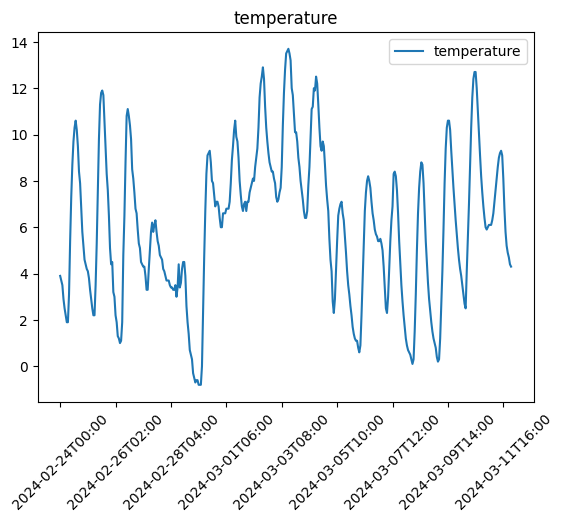

In [105]:
df = pd.DataFrame({'temperature': temperature,},index=time)
plot = df.plot(title="temperature", rot=45)

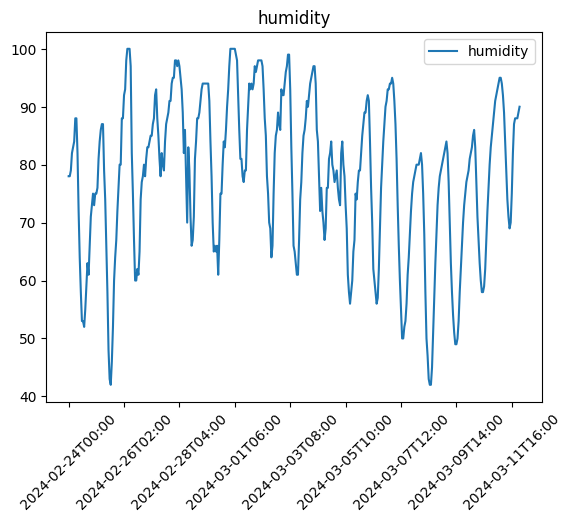

In [106]:
df = pd.DataFrame({'humidity': humidity}, index=time)
plot = df.plot(title="humidity", rot=45)

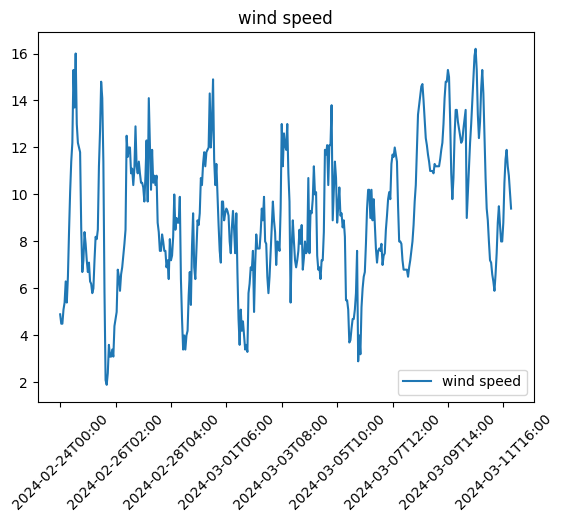

In [107]:
df = pd.DataFrame({'wind speed': wind_speed}, index=time)
plot = df.plot(title="wind speed", rot=45)